Problem Statement - Analyze and visualize sentiment patterns in social media data to understand public opinion and attitudes towards specific topics or brands.


In [11]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

# Download required NLTK resources
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
pip install nltk


     ---------------------------------------- 0.0/42.0 kB ? eta -:--:--
     ---------------------------------------- 0.0/42.0 kB ? eta -:--:--
     --------- ------------------------------ 10.2/42.0 kB ? eta -:--:--
     ------------------ ------------------- 20.5/42.0 kB 162.5 kB/s eta 0:00:01
     ------------------ ------------------- 20.5/42.0 kB 162.5 kB/s eta 0:00:01
     -------------------------------------  41.0/42.0 kB 196.9 kB/s eta 0:00:01
     -------------------------------------- 42.0/42.0 kB 184.5 kB/s eta 0:00:00
     ---------------------------------------- 0.0/57.6 kB ? eta -:--:--
     ------- -------------------------------- 10.2/57.6 kB ? eta -:--:--
     --------------------------------- ---- 51.2/57.6 kB 650.2 kB/s eta 0:00:01
     -------------------------------------- 57.6/57.6 kB 606.6 kB/s eta 0:00:00
   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
    --------------------------------------- 0.0/1.5 MB ? eta -:--:--
   -- --------------

In [3]:
file_path = "C:\\Users\\HP\\Downloads\\twitter_training.csv"  
column_names = ['id', 'topic', 'sentiment', 'post']
df = pd.read_csv(file_path, names=column_names, header=None)

print(df.head())

     id        topic sentiment  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

                                                post  
0  im getting on borderlands and i will murder yo...  
1  I am coming to the borders and I will kill you...  
2  im getting on borderlands and i will kill you ...  
3  im coming on borderlands and i will murder you...  
4  im getting on borderlands 2 and i will murder ...  


In [13]:
df.tail()

,id,topic,sentiment,post,cleaned_post
74677,9200,Nvidia,Positive,Just realized that the Windows partition of my...,realized windows partition mac like years behi...
74678,9200,Nvidia,Positive,Just realized that my Mac window partition is ...,realized mac window partition years behind nvi...
74679,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...,realized windows partition mac years behind nv...
74680,9200,Nvidia,Positive,Just realized between the windows partition of...,realized windows partition mac like years behi...
74681,9200,Nvidia,Positive,Just like the windows partition of my Mac is l...,like windows partition mac like years behind d...


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            74682 non-null  int64 
 1   topic         74682 non-null  object
 2   sentiment     74682 non-null  object
 3   post          73996 non-null  object
 4   cleaned_post  74682 non-null  object
dtypes: int64(1), object(4)
memory usage: 2.8+ MB


In [15]:
df.isnull().sum()

id                0
topic             0
sentiment         0
post            686
cleaned_post      0
dtype: int64

In [16]:
df.dropna(axis=0, inplace=True)
df.isnull().sum()

id              0
topic           0
sentiment       0
post            0
cleaned_post    0
dtype: int64

In [17]:
df.duplicated().sum()

2340

In [18]:

df = df.drop_duplicates()
df.duplicated().sum()

0

In [20]:
def preprocess_text(text):
    if not isinstance(text, str):
        text = ''
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+', '', text)  # Remove mentions
    text = re.sub(r'#\w+', '', text)  # Remove hashtags
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in word_tokenize(text) if word not in stop_words])
    return text

# Apply preprocessing to the post column
df['cleaned_post'] = df['post'].apply(preprocess_text)

# Preview the cleaned data
print(df[['post', 'cleaned_post']].head())

                                                post  \
0  im getting on borderlands and i will murder yo...   
1  I am coming to the borders and I will kill you...   
2  im getting on borderlands and i will kill you ...   
3  im coming on borderlands and i will murder you...   
4  im getting on borderlands 2 and i will murder ...   

                    cleaned_post  
0  im getting borderlands murder  
1            coming borders kill  
2    im getting borderlands kill  
3   im coming borderlands murder  
4  im getting borderlands murder  


C:\Users\HP\AppData\Local\Temp\ipykernel_2192\1457707387.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cleaned_post'] = df['post'].apply(preprocess_text)


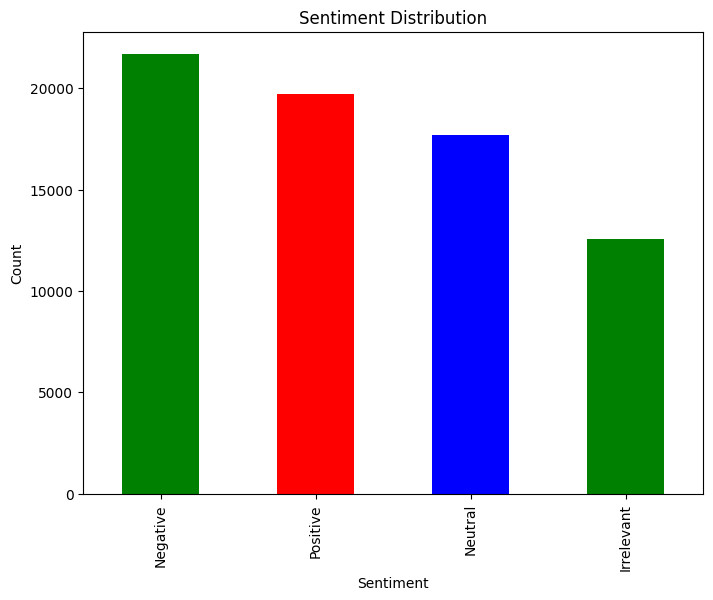

In [21]:
import matplotlib.pyplot as plt
sentiment_counts = df['sentiment'].value_counts()
plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

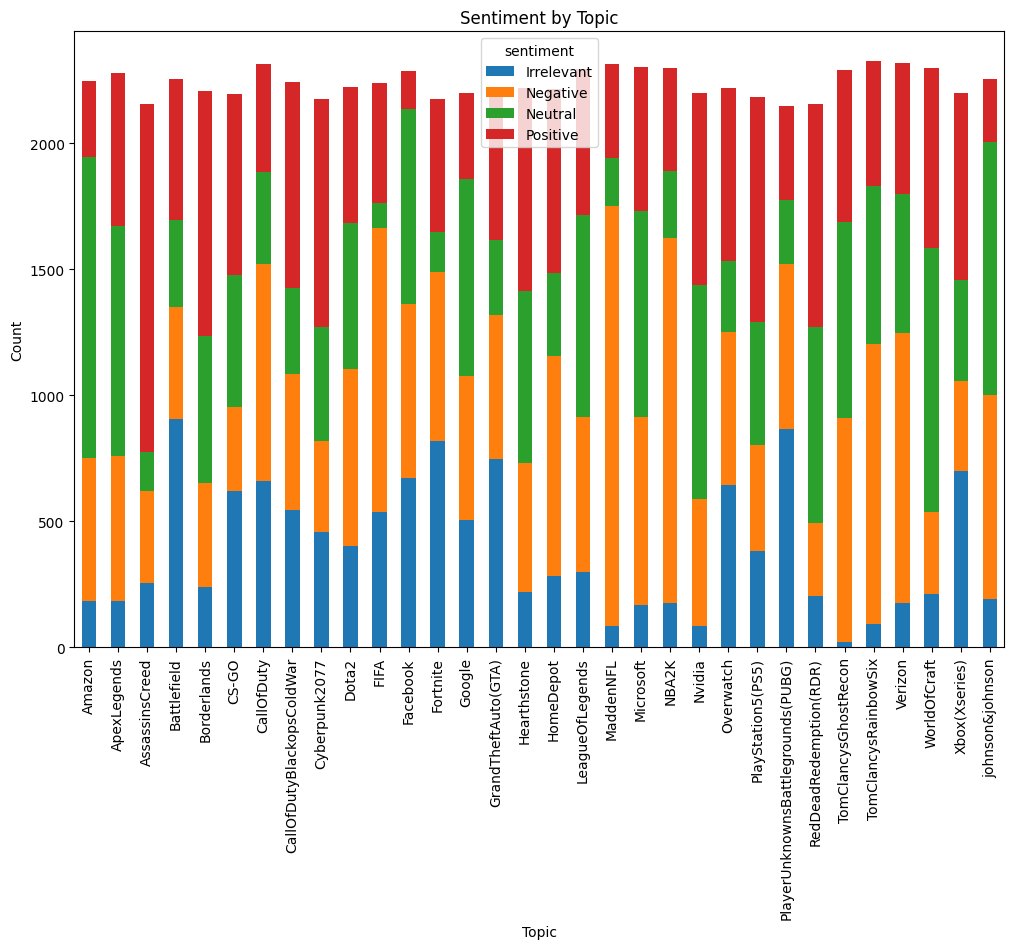

In [22]:
topic_sentiment = df.groupby(['topic', 'sentiment']).size().unstack().fillna(0)
topic_sentiment.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Sentiment by Topic')
plt.xlabel('Topic')
plt.ylabel('Count')
plt.show()